# dN/dS ratio in SARS-CoV-2

The dN/dS ratio can be used to estimate the selective pressure.
Here we aim at exploring the evolution of the dN/dS ratio through time across different countries and genes.

For that purpose we will explore the results from ENA (queried on 07/07/2021, n=44,371) and from GISAID (queried on ...).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_context("talk")

In [2]:
gisaid_download_date = "07/07/2021"
gisaid_num_samples = "1,799,367"
ena_download_date = "29/07/2021"
ena_num_samples = "51,461"

In [3]:
data = pd.read_csv('precomputed_dn_ds_v2.csv')
data.head()

,id,month,region_type,region_name,country,source,ns,s,dn_ds
0,1728,2019-12-01,GENE,E,China,ENA,0,1,NaN
1,1729,2019-12-01,GENE,N,China,ENA,4,1,1.192075
2,1730,2019-12-01,GENE,ORF1ab,China,ENA,18,2,2.483929
3,1731,2019-12-01,GENE,S,China,ENA,2,3,0.189147
4,1732,2020-01-01,GENE,E,China,ENA,0,1,NaN


According to Lythgoe, 2021 these are the ratios of possible synonymous to non-synonymous variants for each gene in SARS-CoV-2.
    

  name  | ratio_synonymous_non_synonymous 
--------|---------------------------------
 S      |               0.283720930232558
 ORF3a  |                         0.28625
 ORF1ab |                       0.2759921
 ORF7b  |                                
 ORF1ab |                       0.2759921
 M      |                           0.306
 ORF10  |               0.266666666666667
 ORF6   |                          0.2425
 ORF8   |               0.268421052631579
 ORF7a  |               0.294411764705882
 N      |               0.298018867924528
 E      |                          0.3375


The ratio across the coding region is 0.281813677

In [4]:
ratios_df = pd.DataFrame(data=[
    ["S", 0.283720930232558],
    ["ORF3a", 0.28625],
    ["ORF1ab", 0.2759921],
    ["ORF7b", None],
    ["M", 0.306],
    ["ORF10", 0.266666666666667],
    ["ORF6", 0.2425],
    ["ORF8", 0.268421052631579],
    ["ORF7a", 0.294411764705882],
    ["N", 0.298018867924528],
    ["E", 0.3375]
], columns=["name", "ratio"])
ratios_df.head()

,name,ratio
0,S,0.283721
1,ORF3a,0.286250
2,ORF1ab,0.275992
3,ORF7b,NaN
4,M,0.306000


In [5]:
ratios = {
    "S": 0.283720930232558,
    "ORF3a": 0.28625,
    "ORF1ab": 0.2759921,
    "ORF7b": None,
    "M": 0.306,
    "ORF10": 0.266666666666667,
    "ORF6": 0.2425,
    "ORF8": 0.268421052631579,
    "ORF7a": 0.294411764705882,
    "N": 0.298018867924528,
    "E": 0.3375
    }

In [6]:
ratio_coding_region = 0.281813677
ratio_spike_protein = 0.283720930232558

In [7]:
genes = list(ratios_df[~ratios_df.ratio.isna()].name)
genes

['S', 'ORF3a', 'ORF1ab', 'M', 'ORF10', 'ORF6', 'ORF8', 'ORF7a', 'N', 'E']

In [8]:
#data = pd.merge(left=data, right=ratios, left_on="region_name", right_on="name")

## Vaciness approvals

In [9]:
approvals = pd.DataFrame(
    [
        [datetime(2020, 12, 11), "FDA approves BNT"],
        [datetime(2020, 12, 18), "FDA approves Moderna"],
        [datetime(2021, 2, 27), "FDA approves J&J"],
        [datetime(2020, 12, 30), "UK approves AZ"],
        [datetime(2020, 12, 21), "EU approves BNT"],
        [datetime(2021, 1, 6), "EU approves Moderna"],
        [datetime(2021, 1, 29), "EU approves AZ"],
    ], 
    columns= ["date", "event"])
approvals.head()

,date,event
0,2020-12-11,FDA approves BNT
1,2020-12-18,FDA approves Moderna
2,2021-02-27,FDA approves J&J
3,2020-12-30,UK approves AZ
4,2020-12-21,EU approves BNT


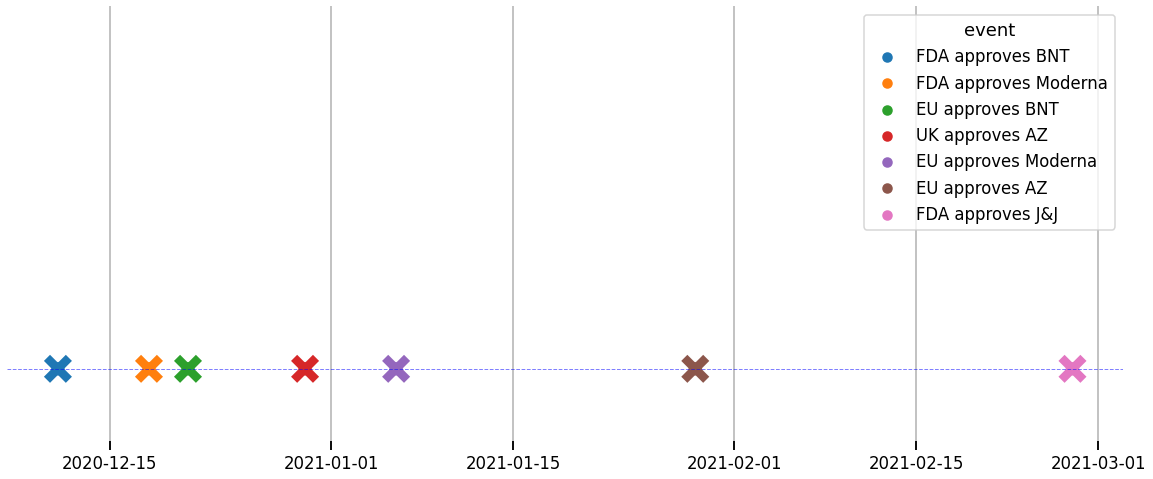

In [10]:
plt.figure(figsize=(20, 8))
#sns.lineplot(data=approvals, x="date")
g = sns.scatterplot(data=approvals.sort_values("date"), x="date", y=0, hue="event", marker='X', s=1000)  ##markers={'marker':'X', 'size':10})
plt.axhline(y=0, color='b', linestyle='--', alpha=0.5, linewidth=1)
sns.despine(bottom=True, left=True)
g.set(yticklabels=[])  
g.set(ylabel=None)
g.set(xlabel=None)
g.tick_params(left=False)
plt.ylim([-0.1, 0.5])
plt.grid(axis="x")
plt.savefig("dn_ds_figures/vaccine_approvals.jpg")

## dN/dS overall

In [11]:
def plot_dn_ds_overall(data, title, filename):
    
    data_to_plot = data.groupby(["month", "source"]).sum().reset_index().sort_values("month")
    data_to_plot["dn_ds"] = ratio_coding_region / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="source", linestyle="--", legend=True, palette='bone')
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="source", size="ns", legend=False, palette='bone')
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

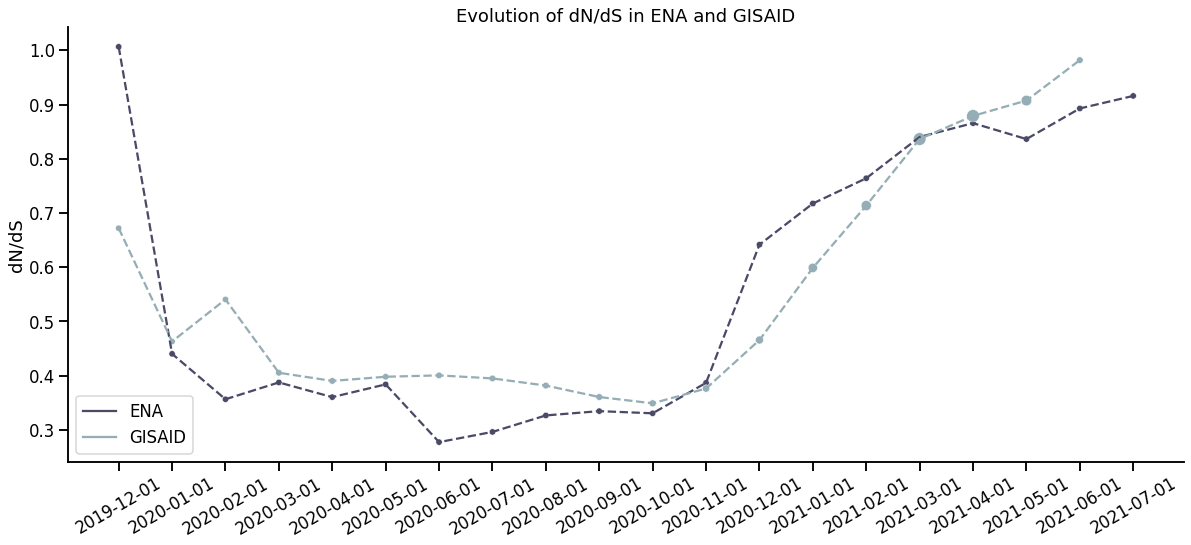

In [12]:
plot_dn_ds_overall(
        data=data, 
        title="Evolution of dN/dS in ENA and GISAID".format(
            gene=g, date=ena_download_date, num_samples=ena_num_samples), 
        filename="dn_ds_figures/dn_ds_ena_vs_gisaid.png"
    )

## dN/dS by gene and country

Plot the evolution month by month of the dN/dS on each of the SARS-CoV-2 genes by country.

In [13]:
def plot_dn_ds_by_country(data, title, filename, ratio, legend=True):
    
    data_to_plot = data.groupby(["month", "country"]).sum().reset_index().sort_values("month")
    data_to_plot["dn_ds"] = ratio / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="country", legend=legend, linestyle="--", palette='Dark2')
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="country", size="ns", legend=False, palette='Dark2')
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    if legend:
        plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

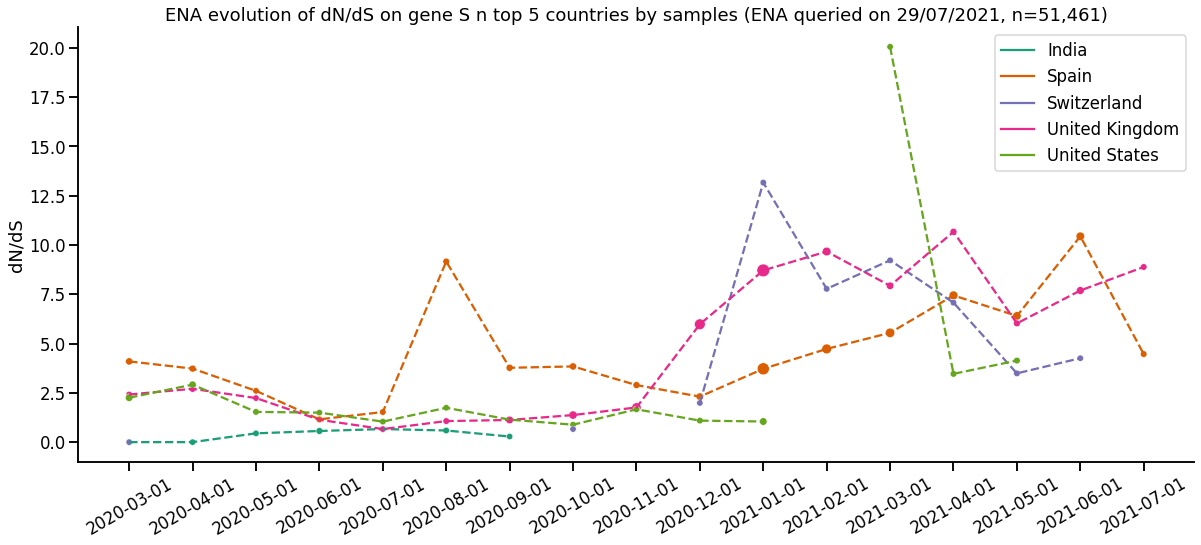

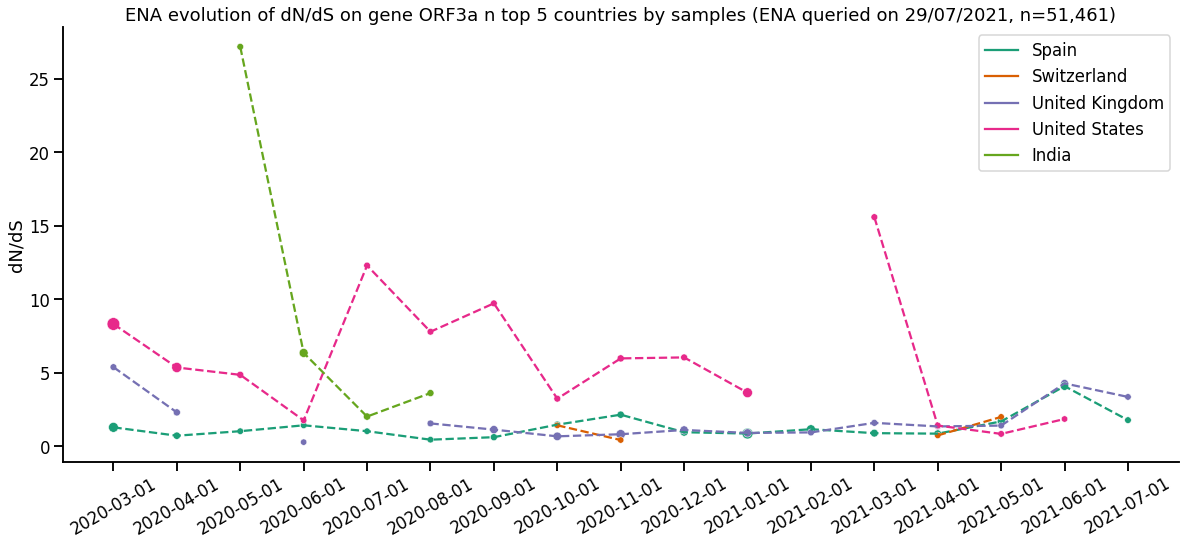

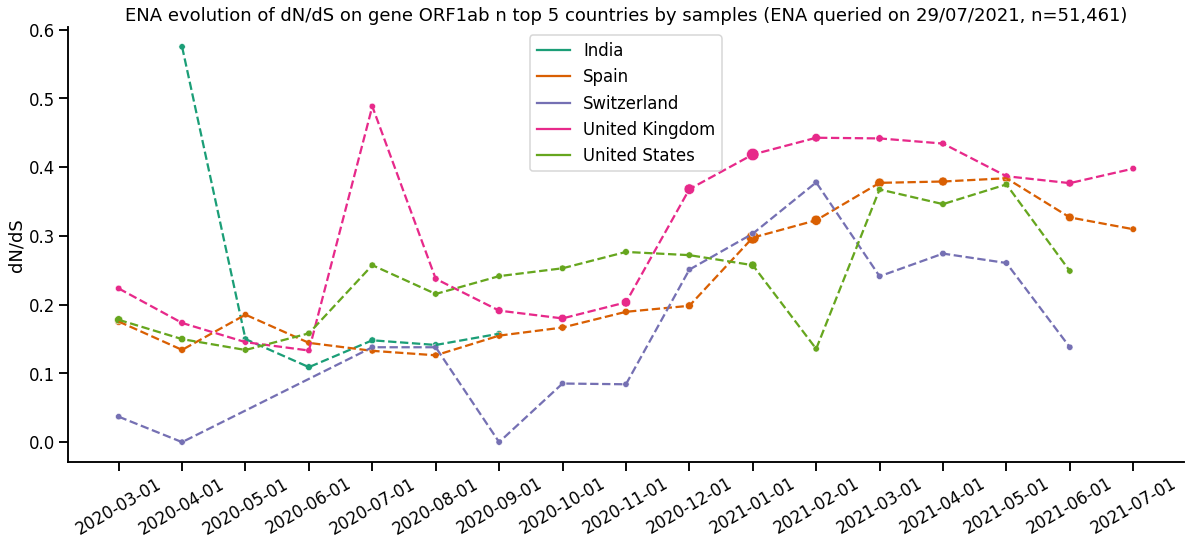

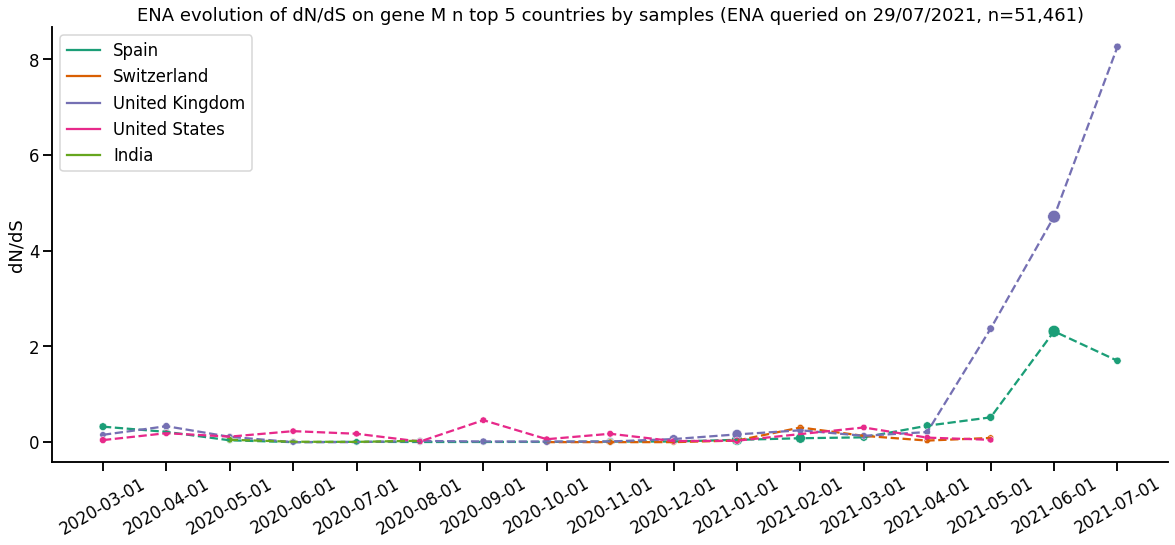

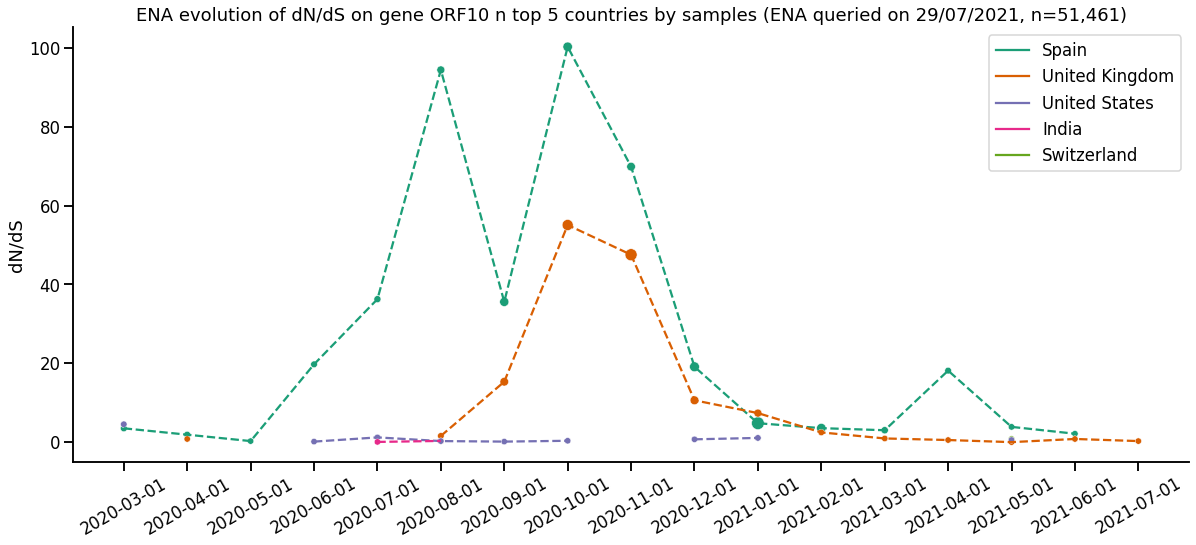

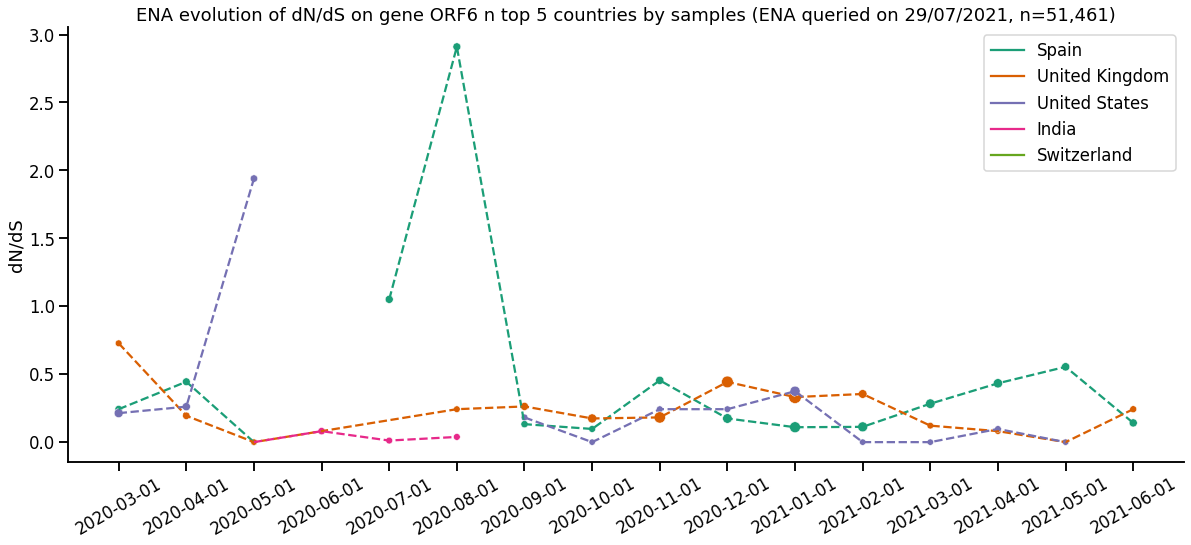

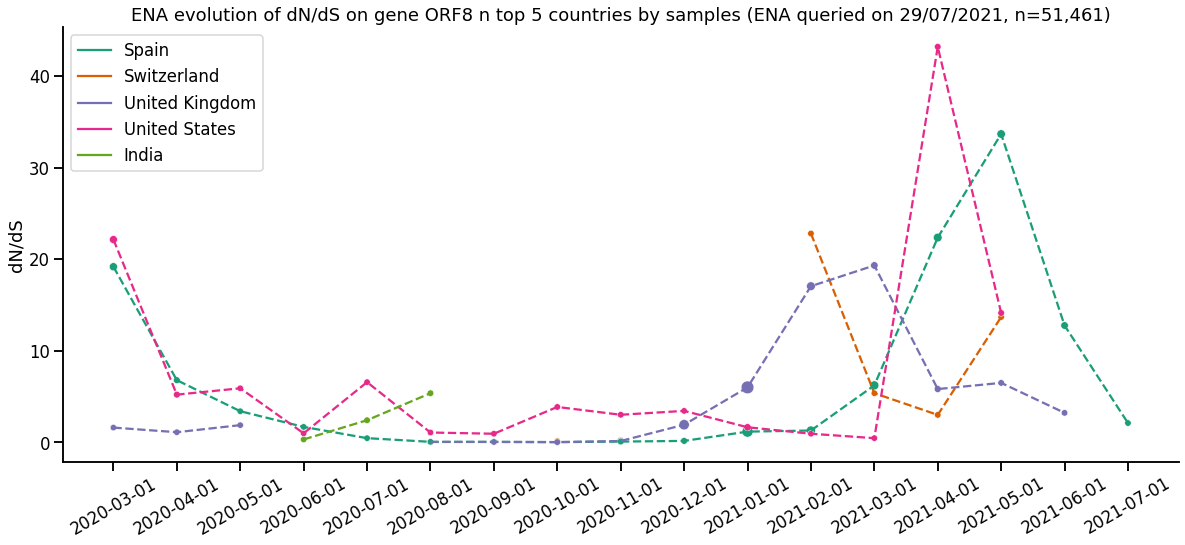

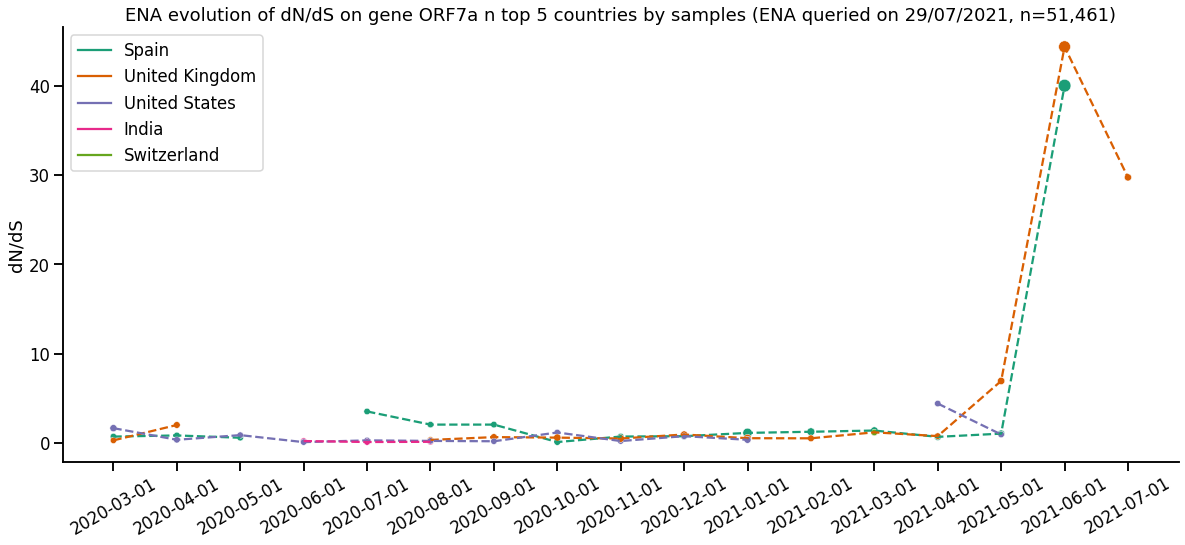

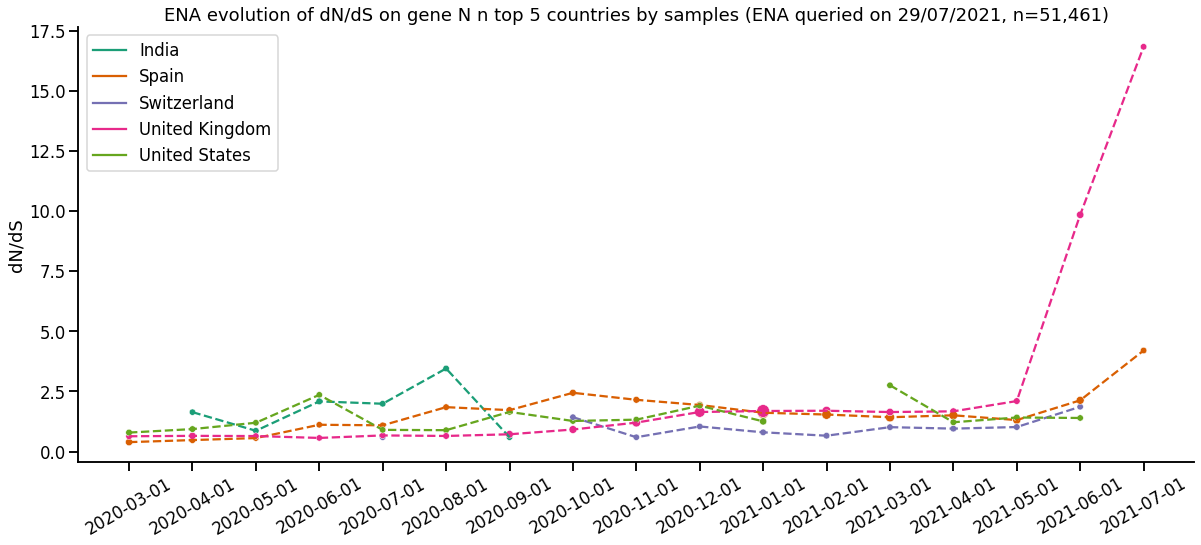

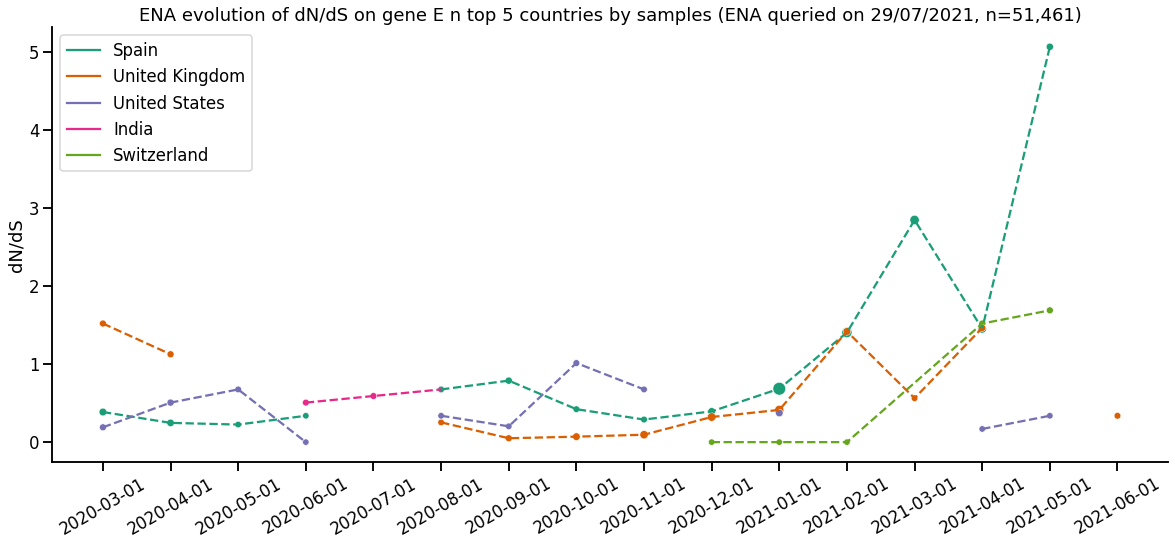

In [14]:
for g in genes:
    top_countries_ena = ["United Kingdom", "United States", "India", "Spain", "Switzerland"]
    plot_dn_ds_by_country(
        data=data[(data.source == "ENA") & (data.region_name == g) & (data.country.isin(top_countries_ena)) & (data.month >= "2020-03-01")], 
        title="ENA evolution of dN/dS on gene {gene} n top 5 countries by samples (ENA queried on {date}, n={num_samples})".format(
            gene=g, date=ena_download_date, num_samples=ena_num_samples), 
        filename="dn_ds_figures/dn_ds_{gene}_by_month_top5_countries_ena.png".format(gene=g),
        ratio=ratios[g]
    )

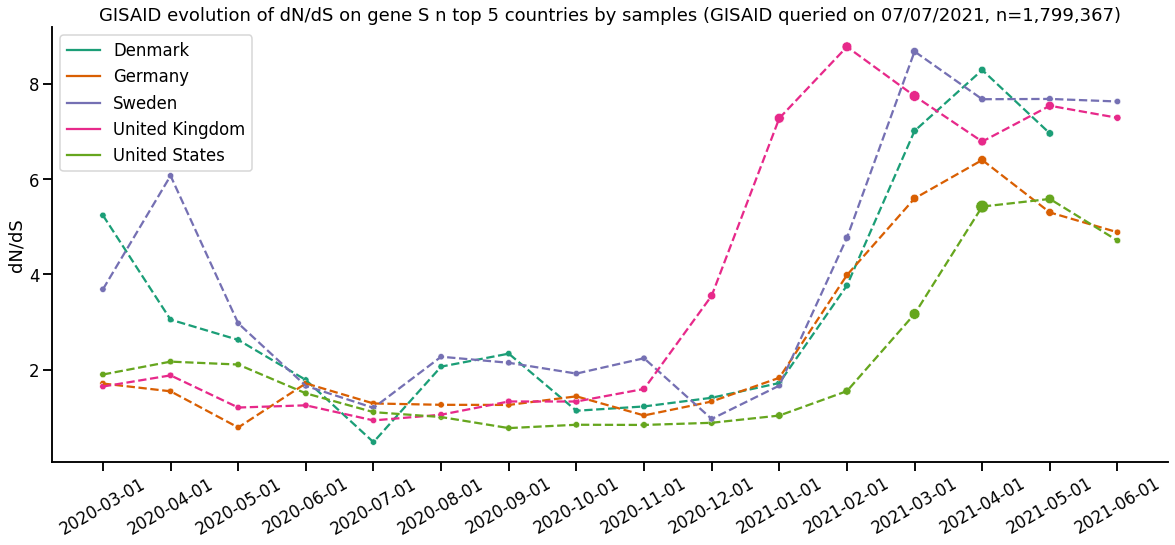

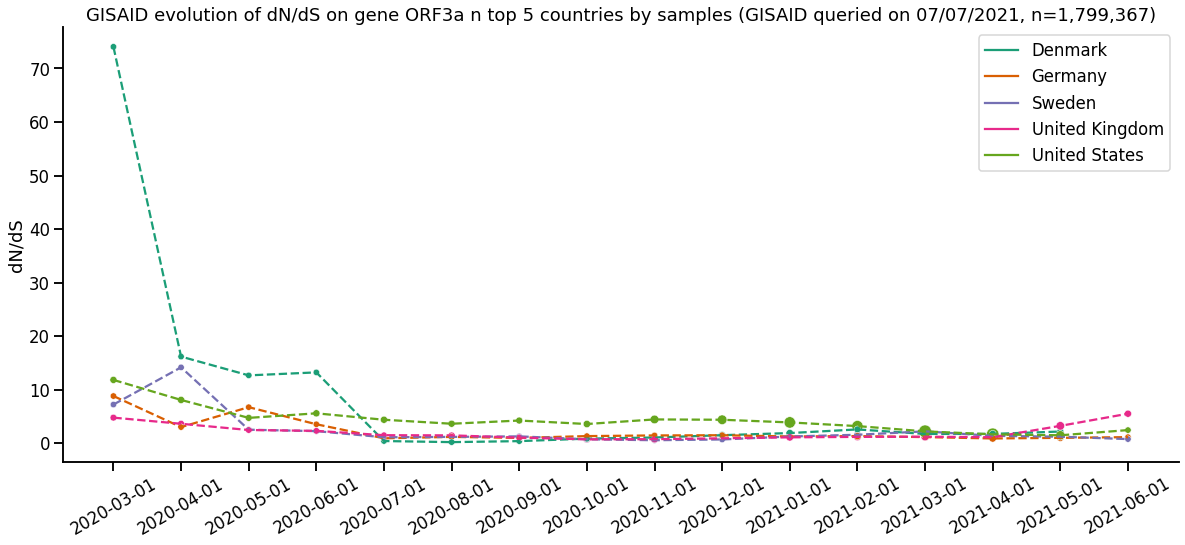

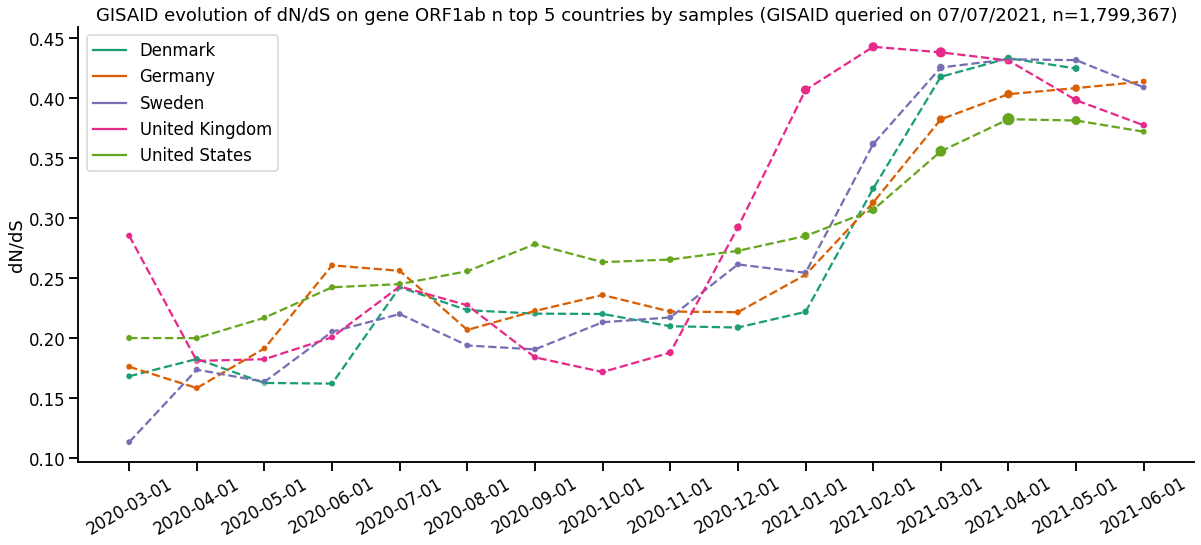

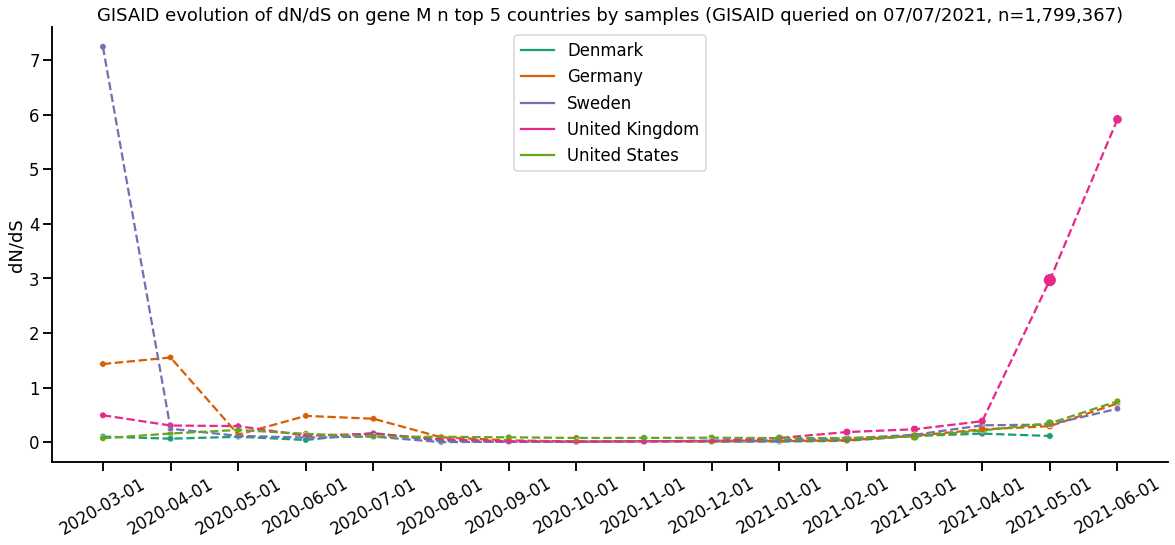

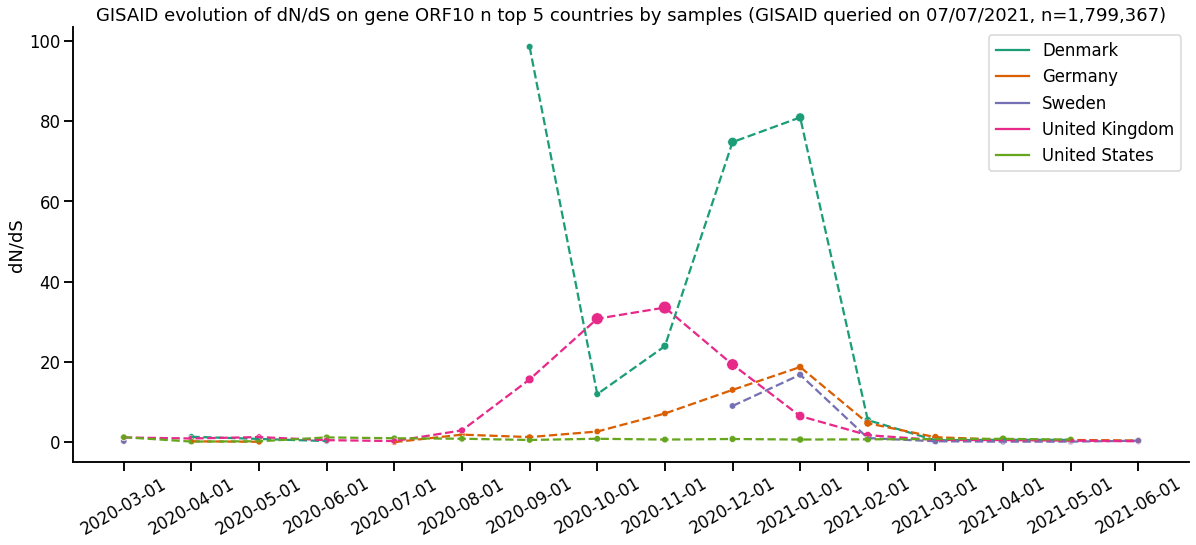

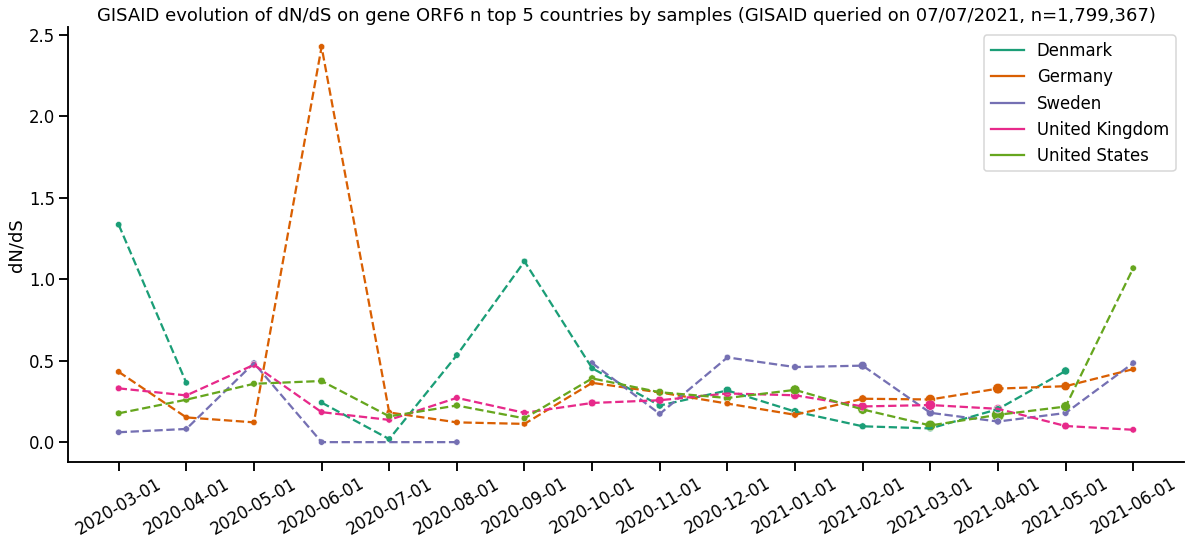

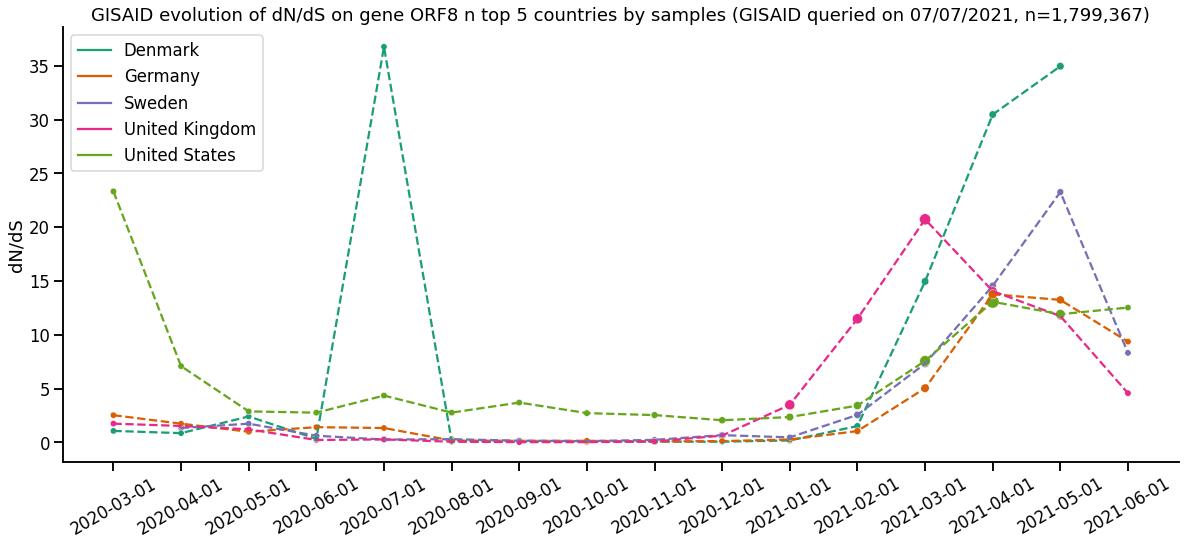

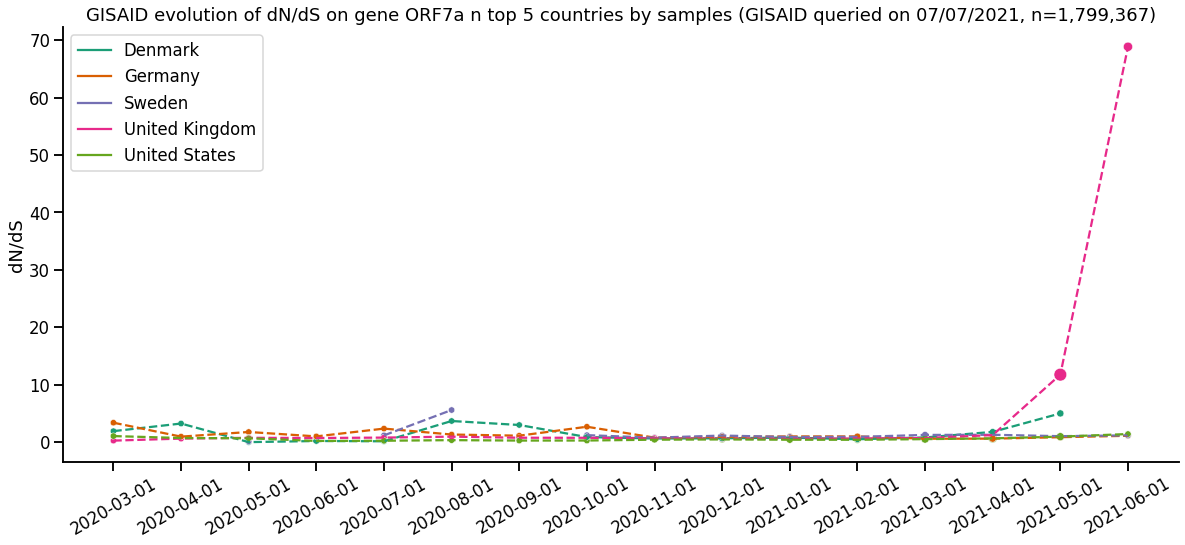

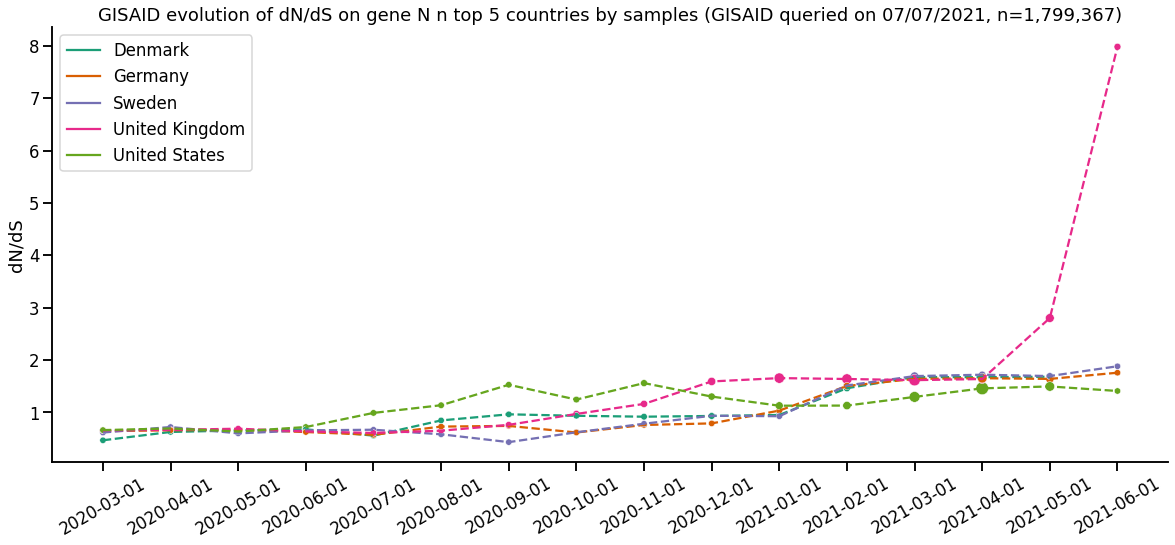

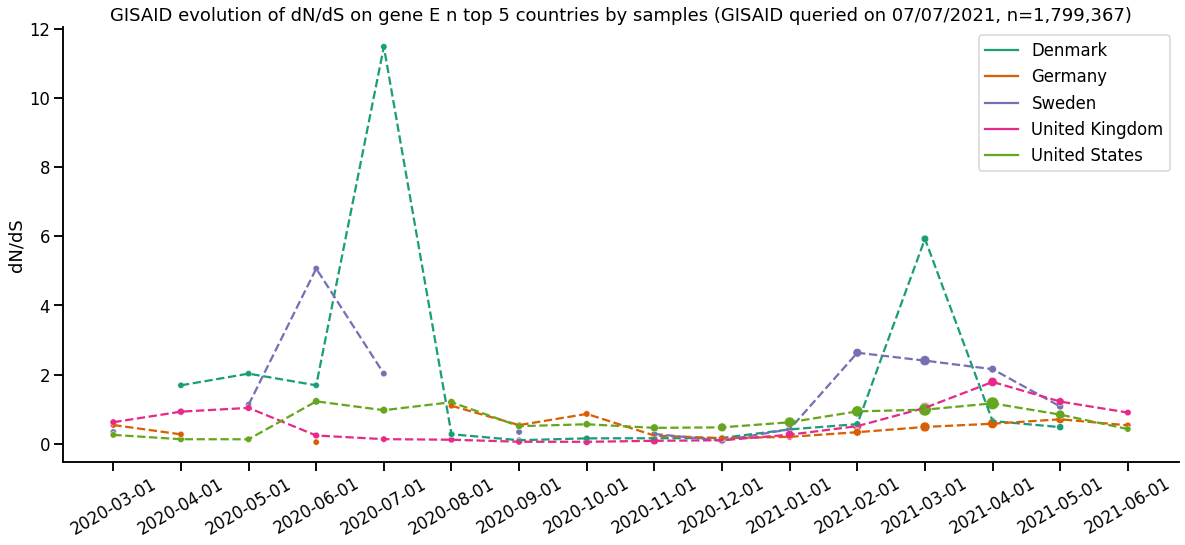

In [15]:
top_countries_gisaid = ["United Kingdom", "United States", "Germany", "Denmark", "Sweden"]
for g in genes:
    plot_dn_ds_by_country(
        data=data[(data.source == "GISAID") & (data.region_name == g) & (data.country.isin(top_countries_gisaid)) & (data.month >= "2020-03-01")], 
        title="GISAID evolution of dN/dS on gene {gene} n top 5 countries by samples (GISAID queried on {date}, n={num_samples})".format(
            gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples), 
        filename="dn_ds_figures/dn_ds_{gene}_by_month_top5_countries_gisaid.png".format(gene=g),
        ratio=ratios[g]
    )

## dN/dS on the coding region by country

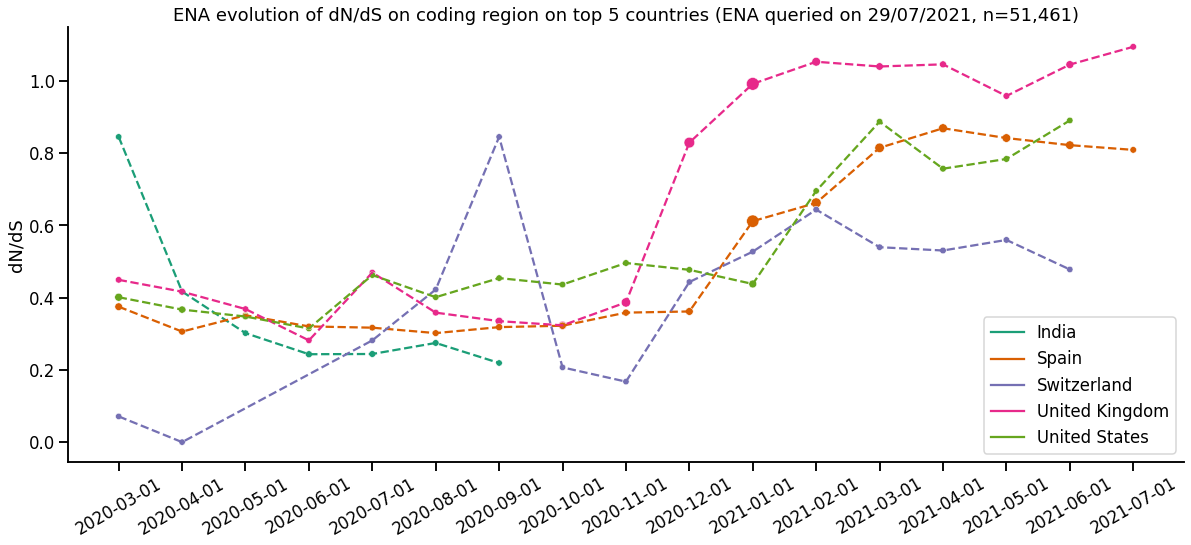

In [16]:
plot_dn_ds_by_country(
    data=data[(data.source == "ENA") & (data.country.isin(top_countries_ena)) & (data.month >= "2020-03-01")], 
    title="ENA evolution of dN/dS on coding region on top 5 countries (ENA queried on {date}, n={num_samples})".format(date=ena_download_date, num_samples=ena_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_countries_ena.png", ratio=ratio_coding_region)

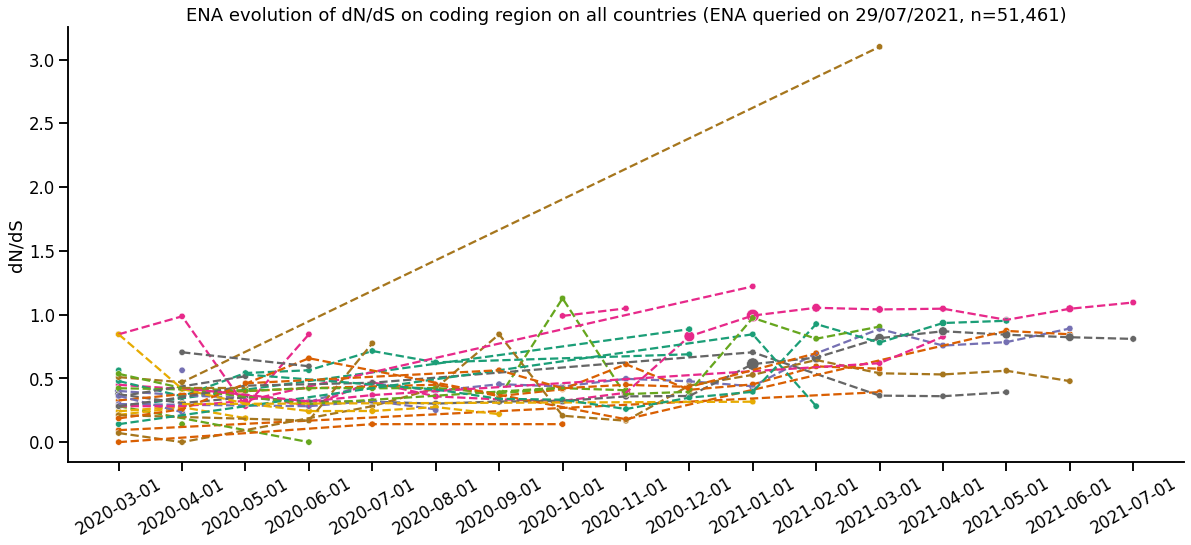

In [17]:
plot_dn_ds_by_country(
    data=data[(data.source == "ENA") & (data.month >= "2020-03-01")], 
    title="ENA evolution of dN/dS on coding region on all countries (ENA queried on {date}, n={num_samples})".format(date=ena_download_date, num_samples=ena_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_all_countries_ena.png", legend=False, ratio=ratio_coding_region)

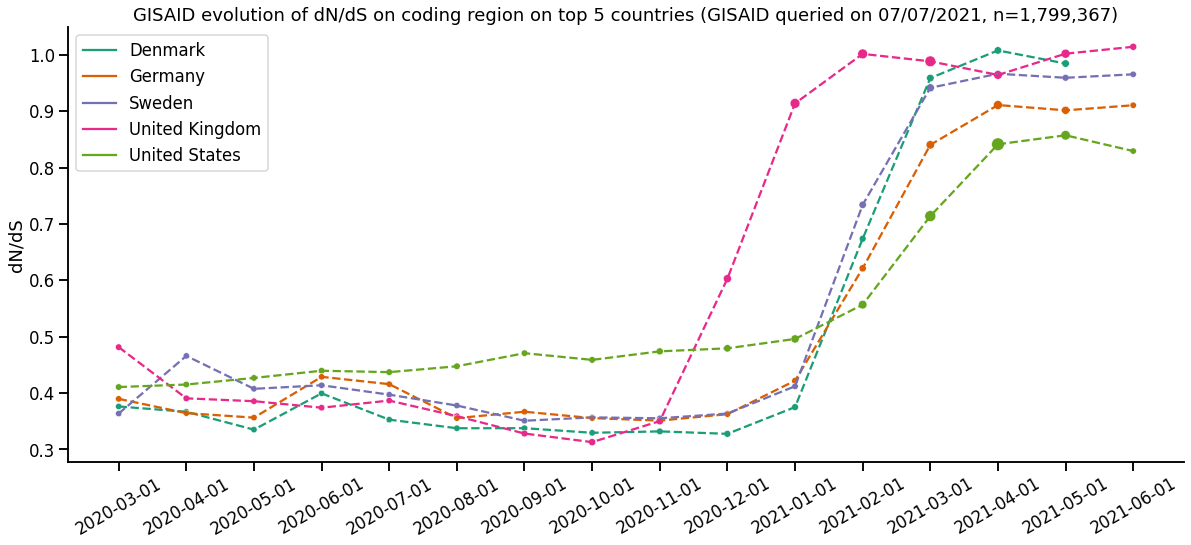

In [18]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.country.isin(top_countries_gisaid)) & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on top 5 countries (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_countries_gisaid.png", ratio=ratio_coding_region)

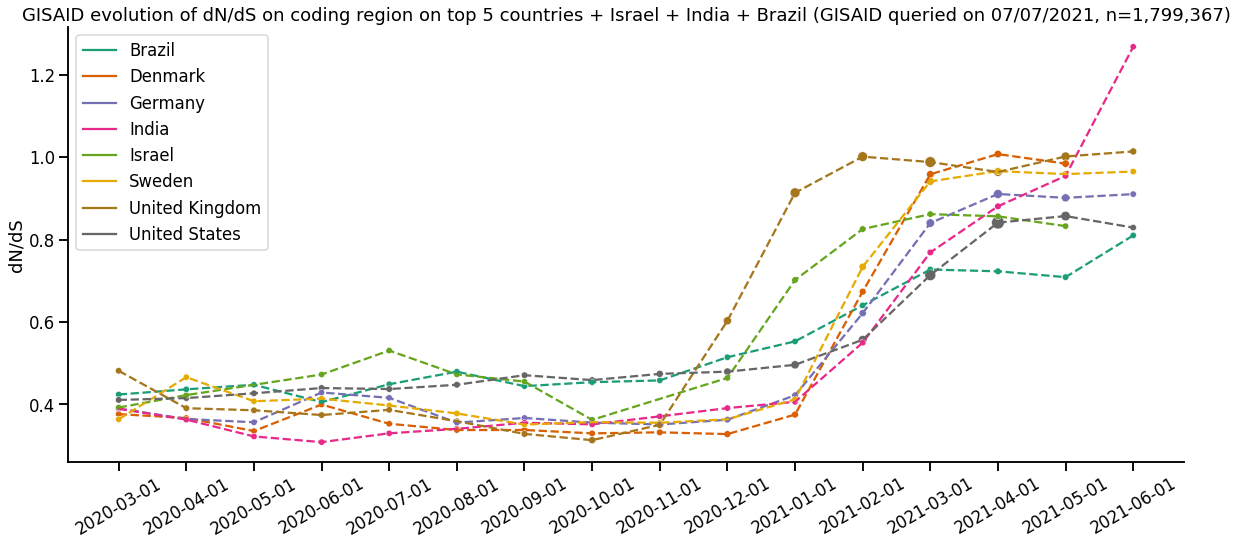

In [19]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.country.isin(top_countries_gisaid + ["Israel", "India", "Brazil"])) & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on top 5 countries + Israel + India + Brazil (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_israel_india_brazil_countries_gisaid.png", ratio=ratio_coding_region)

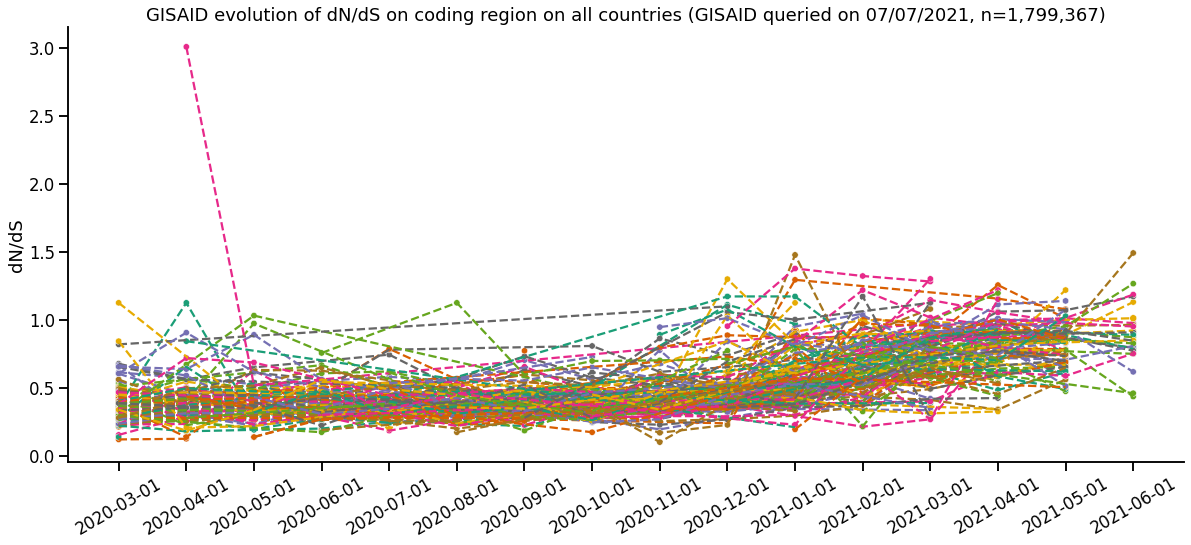

In [20]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on all countries (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples),
    filename="dn_ds_figures/dn_ds_coding_region_by_month_all_countries_gisaid.png", ratio=ratio_coding_region, legend=False)

## dN/dS by gene

In [21]:
def plot_dn_ds_by_gene(data, title, filename, legend=True, yrange=None):
    
    data_to_plot = data.groupby(["month", "region_name"]).sum().reset_index().sort_values("month")
    data_to_plot = pd.merge(left=data_to_plot, right=ratios_df, left_on="region_name", right_on="name")
    data_to_plot["dn_ds"] = data_to_plot.ratio / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="region_name", legend=legend, linestyle="--", palette='Dark2')
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="region_name", size="ns", legend=False, palette='Dark2')
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    if yrange:
        plt.ylim(yrange)
    if legend:
        plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

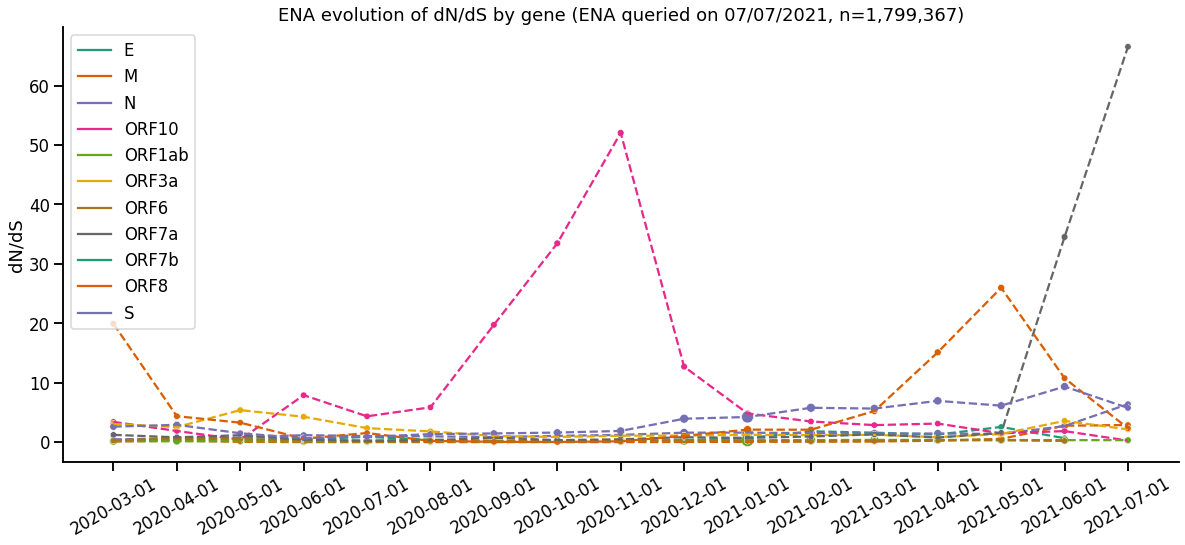

In [22]:
plot_dn_ds_by_gene(
        data=data[(data.source == "ENA") & (data.month >= "2020-03-01")], 
        title="ENA evolution of dN/dS by gene (ENA queried on {date}, n={num_samples})".format(gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples),
        filename="dn_ds_figures/dn_ds_by_gene_ena.png"
    )

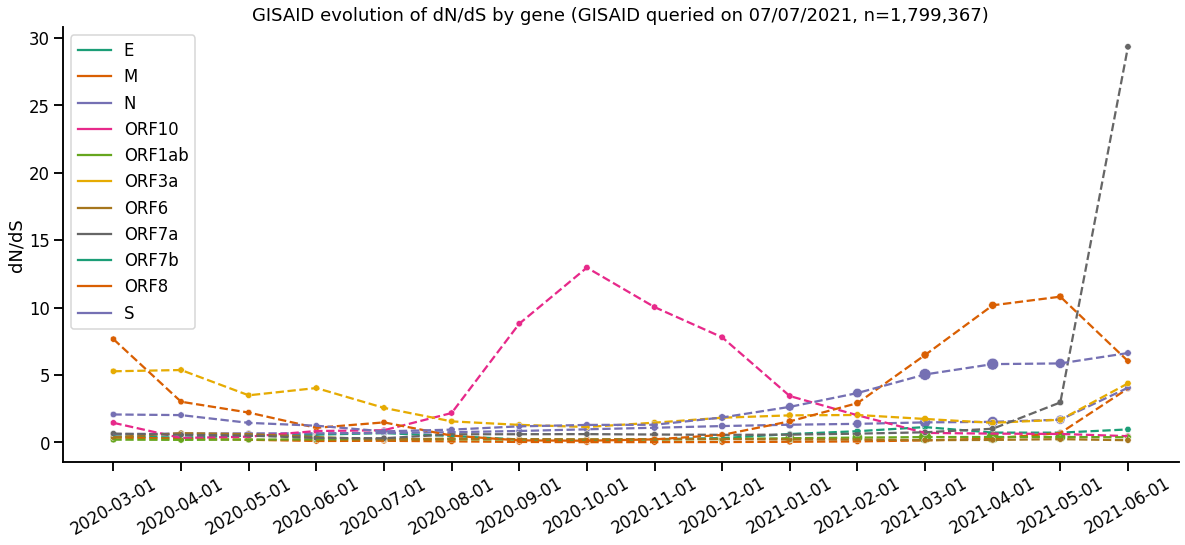

In [23]:
plot_dn_ds_by_gene(
        data=data[(data.source == "GISAID") & (data.month >= "2020-03-01")], 
        title="GISAID evolution of dN/dS by gene (GISAID queried on {date}, n={num_samples})".format(gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples),
        filename="dn_ds_figures/dn_ds_by_gene_gisaid.png"
    )